## Creating Cohorts of Songs 
Problem scenario:

Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

Problem objective:

As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

Input dataset: DatasetLinks to an external site.

Data description:

The variables such as birth year, education, income, and others pertain to the first 'P' or 'People' in the tabular data presented to the user. The expenditures on items like wine, fruits, and gold, are associated with ‘Product’. Information relevant to sales channels, such as websites and stores, is connected to ‘Place’, and the fields discussing promotions and the outcomes of various campaigns are linked to ‘Promotion’.

Steps to perform:

After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.
There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the categories of education and marital status for data cleaning.
Create variables to represent the total number of children, age, and total spending.
Derive the total purchases from the number of transactions across the three channels.
Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.
Apply ordinal and one-hot encoding based on the various types of categorical variables.
Generate a heatmap to illustrate the correlation between different pairs of variables.
Test the following hypotheses:
Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
Customers with children likely experience time constraints, making online shopping a more convenient option.
Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
Does the United States significantly outperform the rest of the world in total purchase volumes?
Use appropriate visualization to help analyze the following:
Identify the top-performing products and those with the lowest revenue.
Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
Determine the country with the highest number of customers who accepted the last campaign.
Investigate if there is a discernible pattern in the number of children at home and the total expenditure.
Analyze the educational background of customers who lodged complaints in the last two years.

In [4]:
# Import Pandas to read file
import pandas as pd
df = pd.read_csv(r"C:\Users\kgjam\OneDrive\Desktop\GIT\Assignment\marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


##### describe() function is used to generate descriptive statistics of a DataFrame or Series.
##### It helps you quickly understand the distribution and summary of your dataset

In [6]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### .isna() helps you check how many missing (NaN) values are in each column of a DataFrame

In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

###### df.dtypes shows the data type of each column in your DataFrame

In [8]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [47]:
# To remove leading and trailing extra spaces in the column
df.columns = df.columns.str.strip()

In [13]:
df[['Dt_Customer', 'Income']].head()

,Dt_Customer,Income
0,6/16/14,"$84,835.00"
1,6/15/14,"$57,091.00"
2,5/13/14,"$67,267.00"
3,5/11/14,"$32,474.00"
4,4/8/14,"$21,474.00"


In [74]:
#Dt_customer are not in Date format so we need to convert that in Date formate using below code
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y', errors='coerce')
df['Dt_Customer']

134    2012-11-19
262    2013-11-15
394    2014-03-02
449    2013-02-20
525    2013-07-11
590    2012-09-14
899    2013-04-01
997    2014-05-27
1096   2014-01-12
1185   2013-05-18
1213   2012-08-12
1312   2013-06-17
1515   2013-08-23
1558   2013-06-03
1693   2013-10-30
1804   2013-11-05
1858   2013-05-31
1863   2013-03-03
1880   2013-06-23
1967   2013-11-23
1983   2012-09-03
2139   2013-10-18
2165   2014-01-01
2170   2013-08-11
Name: Dt_Customer, dtype: datetime64[ns]

In [79]:
df['Income'] = df['Income'].replace(r'[\$,]', '', regex=True).astype(float)


In [80]:
df['Income'] 

134    NaN
262    NaN
394    NaN
449    NaN
525    NaN
590    NaN
899    NaN
997    NaN
1096   NaN
1185   NaN
1213   NaN
1312   NaN
1515   NaN
1558   NaN
1693   NaN
1804   NaN
1858   NaN
1863   NaN
1880   NaN
1967   NaN
1983   NaN
2139   NaN
2165   NaN
2170   NaN
Name: Income, dtype: float64

In [76]:
(df.isna().sum() / len(df)) * 100


ID                       0.0
Year_Birth               0.0
Education                0.0
Marital_Status           0.0
Income                 100.0
Kidhome                  0.0
Teenhome                 0.0
Dt_Customer              0.0
Recency                  0.0
MntWines                 0.0
MntFruits                0.0
MntMeatProducts          0.0
MntFishProducts          0.0
MntSweetProducts         0.0
MntGoldProds             0.0
NumDealsPurchases        0.0
NumWebPurchases          0.0
NumCatalogPurchases      0.0
NumStorePurchases        0.0
NumWebVisitsMonth        0.0
AcceptedCmp3             0.0
AcceptedCmp4             0.0
AcceptedCmp5             0.0
AcceptedCmp1             0.0
AcceptedCmp2             0.0
Response                 0.0
Complain                 0.0
Country                  0.0
dtype: float64

In [24]:
df[df.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,AUS


###### This heatmap visualizes missing values in the dataset, where red indicates missing data and yellow indicates present values.

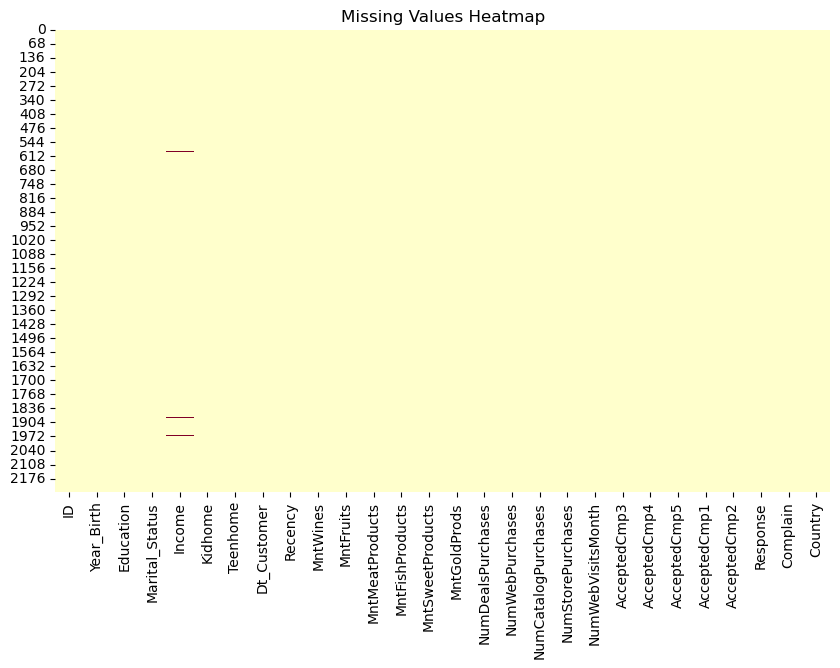

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='YlOrRd')
plt.title("Missing Values Heatmap")
plt.show()


In [149]:
# Reload full DataFrame if filtered earlier

df = pd.read_csv(r"C:\Users\kgjam\OneDrive\Desktop\GIT\Assignment\marketing_data.csv")
# Clean again as needed
df.columns = df.columns.str.strip()
df['Income'] = df['Income'].replace('[\\$,]', '', regex=True).astype(float)
df['Education'] = df['Education'].str.strip().str.lower()
df['Marital_Status'] = df['Marital_Status'].str.strip().str.lower()

# Apply group + global mean imputation
global_mean_income = df['Income'].dropna().mean()
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))
df['Income'] = df['Income'].fillna(global_mean_income)

# Check full info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [150]:
df_missing = df[df['Income'].isna()]  # or any filtering
df_missing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


In [151]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y', errors='coerce')
df['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [98]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,graduation,divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,graduation,single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,graduation,married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,graduation,together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,graduation,single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,phd,divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n cycle,married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,graduation,divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,graduation,married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [152]:
from datetime import datetime
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df['Age']

0       55
1       64
2       67
3       58
4       36
        ..
2235    49
2236    48
2237    49
2238    47
2239    56
Name: Age, Length: 2240, dtype: int64

In [102]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age'],
      dtype='object')

In [153]:
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Spend']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Spend, Length: 2240, dtype: int64

In [105]:
df['Total_Spend'] = df.loc[:, df.columns.str.startswith('Mnt')].sum(axis=1)
df['Total_Spend']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Spend, Length: 2240, dtype: int64

#### Feature engineering is the process of creating new variables (columns) from existing data to make it easier to understand customer behavior and run meaningful analysis or modeling.

In this case, the goal is to understand individual customer behavior based on:

Their demographics

How much they spend

How many children they have

How they shop



In [154]:
from datetime import datetime

# Optional: use dynamic current year
current_year = datetime.now().year

# 1. Total children per customer
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Children']
# 2. Age of the customer
df['Age'] = current_year - df['Year_Birth']
df['Age'] 
# 3. Total money spent per customer
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Spend']
# 4. Total purchase transactions
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Total_Purchases']

0       14
1       17
2       10
3        3
4        6
        ..
2235    18
2236     4
2237    12
2238    19
2239    17
Name: Total_Purchases, Length: 2240, dtype: int64

######  Z-score to detect outliers in the 'Income' column by identifying values that are more than 3 standard deviations from the mean.

In [155]:
from scipy.stats import zscore
df['Income_zscore'] = zscore(df['Income'])
outliers_z = df[abs(df['Income_zscore']) > 3]
print(outliers_z.shape[0], "outliers found using z-score")


8 outliers found using z-score


In [156]:
df[abs(df['Income_zscore']) > 3]  # These are the outliers


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Spend,Total_Children,Total_Purchases,Income_zscore
325,4931,1977,graduation,together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,SA,48,1730,0,28,4.190126
497,1501,1982,phd,married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,US,43,1717,0,29,4.336205
527,9432,1977,graduation,together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,SA,48,62,1,7,24.542928
731,1503,1976,phd,together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,SP,49,107,2,1,4.399877
853,5336,1971,master,together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,SP,54,59,1,2,4.213574
1826,5555,1975,graduation,divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,SP,50,6,0,0,4.061423
1925,11181,1949,phd,married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,CA,76,8,0,0,4.181258
2204,8475,1973,phd,married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,IND,52,1608,1,22,4.194001


###### ordinal encoding by mapping education levels to numerical values based on their order of hierarchy.

In [157]:
education_order = {'basic': 0, 'graduation': 1, 'master': 2, 'phd': 3}
df['Education_encoded'] = df['Education'].map(education_order)
df['Education_encoded'] 

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2235    3.0
2236    NaN
2237    1.0
2238    1.0
2239    3.0
Name: Education_encoded, Length: 2240, dtype: float64

##### Value '2n cycle' with 'basic' in the 'Education' column to standardize categories.

In [158]:
df['Education'] = df['Education'].replace('2n cycle', 'basic')


In [128]:
df['Education'].unique()  # education unique values

array(['graduation', 'phd', 'basic', 'master'], dtype=object)

In [159]:
df.iloc[2236] # Retrieves the row at index position 2236 from the DataFrame using integer-based indexing

ID                                    5263
Year_Birth                            1977
Education                            basic
Marital_Status                     married
Income                             31056.0
Kidhome                                  1
Teenhome                                 0
Dt_Customer            2013-01-22 00:00:00
Recency                                 99
MntWines                                 5
MntFruits                               10
MntMeatProducts                         13
MntFishProducts                          3
MntSweetProducts                         8
MntGoldProds                            16
NumDealsPurchases                        1
NumWebPurchases                          1
NumCatalogPurchases                      0
NumStorePurchases                        3
NumWebVisitsMonth                        8
AcceptedCmp3                             0
AcceptedCmp4                             0
AcceptedCmp5                             0
AcceptedCmp

###### counts the occurrences of each unique value in the 'Marital_Status' column to show the distribution of categories.

In [160]:
df['Marital_Status'].value_counts()

Marital_Status
married     864
together    580
single      480
divorced    232
widow        77
alone         3
yolo          2
absurd        2
Name: count, dtype: int64

##### Filters out rows where 'Marital_Status' is 'yolo' or 'absurd', keeping only valid entries in the new DataFrame df_marital

In [137]:
df_marital = df[~df['Marital_Status'].isin(['yolo', 'absurd'])]
df_marital

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Response,Complain,Country,Age,Total_Spend,Total_Children,Total_Purchases,Income_zscore,Education_encoded
0,1826,1970,graduation,divorced,84835.0,0,0,2014-06-16,0,189,...,0,1,0,SP,55,1190,0,14,1.301659,1
1,1,1961,graduation,single,57091.0,0,0,2014-06-15,0,464,...,1,1,0,CA,64,577,0,17,0.193424,1
2,10476,1958,graduation,married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,67,251,1,10,0.599905,1
3,1386,1967,graduation,together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,58,11,2,3,-0.789903,1
4,5371,1989,graduation,single,21474.0,1,0,2014-04-08,0,6,...,0,1,0,SP,36,91,1,6,-1.229299,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,phd,divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,US,49,689,1,18,0.568308,3
2236,5263,1977,basic,married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,SP,48,55,1,4,-0.846545,0
2237,22,1976,graduation,divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,SP,49,309,1,12,-0.237224,1
2238,528,1978,graduation,married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,IND,47,1383,0,19,0.542064,1


In [161]:
df['Marital_Status'].value_counts()

Marital_Status
married     864
together    580
single      480
divorced    232
widow        77
alone         3
yolo          2
absurd        2
Name: count, dtype: int64

###### code displays the frequency count of each unique value in the 'Country' column to understand country-wise distribution.

In [142]:
df['Country'].value_counts()

Country
SP       1095
SA        337
CA        266
AUS       159
IND       147
GER       120
US        109
Other       3
Name: count, dtype: int64

###### code replaces the value 'ME' with 'Other' in the 'Country' column to consolidate categories

In [141]:
df.loc[:, 'Country'] = df['Country'].replace({'ME': 'Other'})
df.loc[:, 'Country']

0        SP
1        CA
2        US
3       AUS
4        SP
       ... 
2235     US
2236     SP
2237     SP
2238    IND
2239     CA
Name: Country, Length: 2236, dtype: object

##### code applies one-hot encoding to 'Marital_Status' and 'Country' columns, 
##### converting them into binary columns while dropping the first category to avoid multicollinearity.

In [162]:
df = pd.get_dummies(df, columns=['Marital_Status', 'Country'], drop_first=True, dtype=int)
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Status_together,Marital_Status_widow,Marital_Status_yolo,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,graduation,84835.0,0,0,2014-06-16,0,189,104,...,0,0,0,0,0,0,0,0,1,0
1,1,1961,graduation,57091.0,0,0,2014-06-15,0,464,5,...,0,0,0,1,0,0,0,0,0,0
2,10476,1958,graduation,67267.0,0,1,2014-05-13,0,134,11,...,0,0,0,0,0,0,0,0,0,1
3,1386,1967,graduation,32474.0,1,1,2014-05-11,0,10,0,...,1,0,0,0,0,0,0,0,0,0
4,5371,1989,graduation,21474.0,1,0,2014-04-08,0,6,16,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,phd,66476.0,0,1,2013-03-07,99,372,18,...,0,0,0,0,0,0,0,0,0,1
2236,5263,1977,basic,31056.0,1,0,2013-01-22,99,5,10,...,0,0,0,0,0,0,0,0,1,0
2237,22,1976,graduation,46310.0,1,0,2012-12-03,99,185,2,...,0,0,0,0,0,0,0,0,1,0
2238,528,1978,graduation,65819.0,0,0,2012-11-29,99,267,38,...,0,0,0,0,0,1,0,0,0,0


###### Generates a correlation heatmap for all numeric features, helping to visualize the strength and direction of relationships between variables.

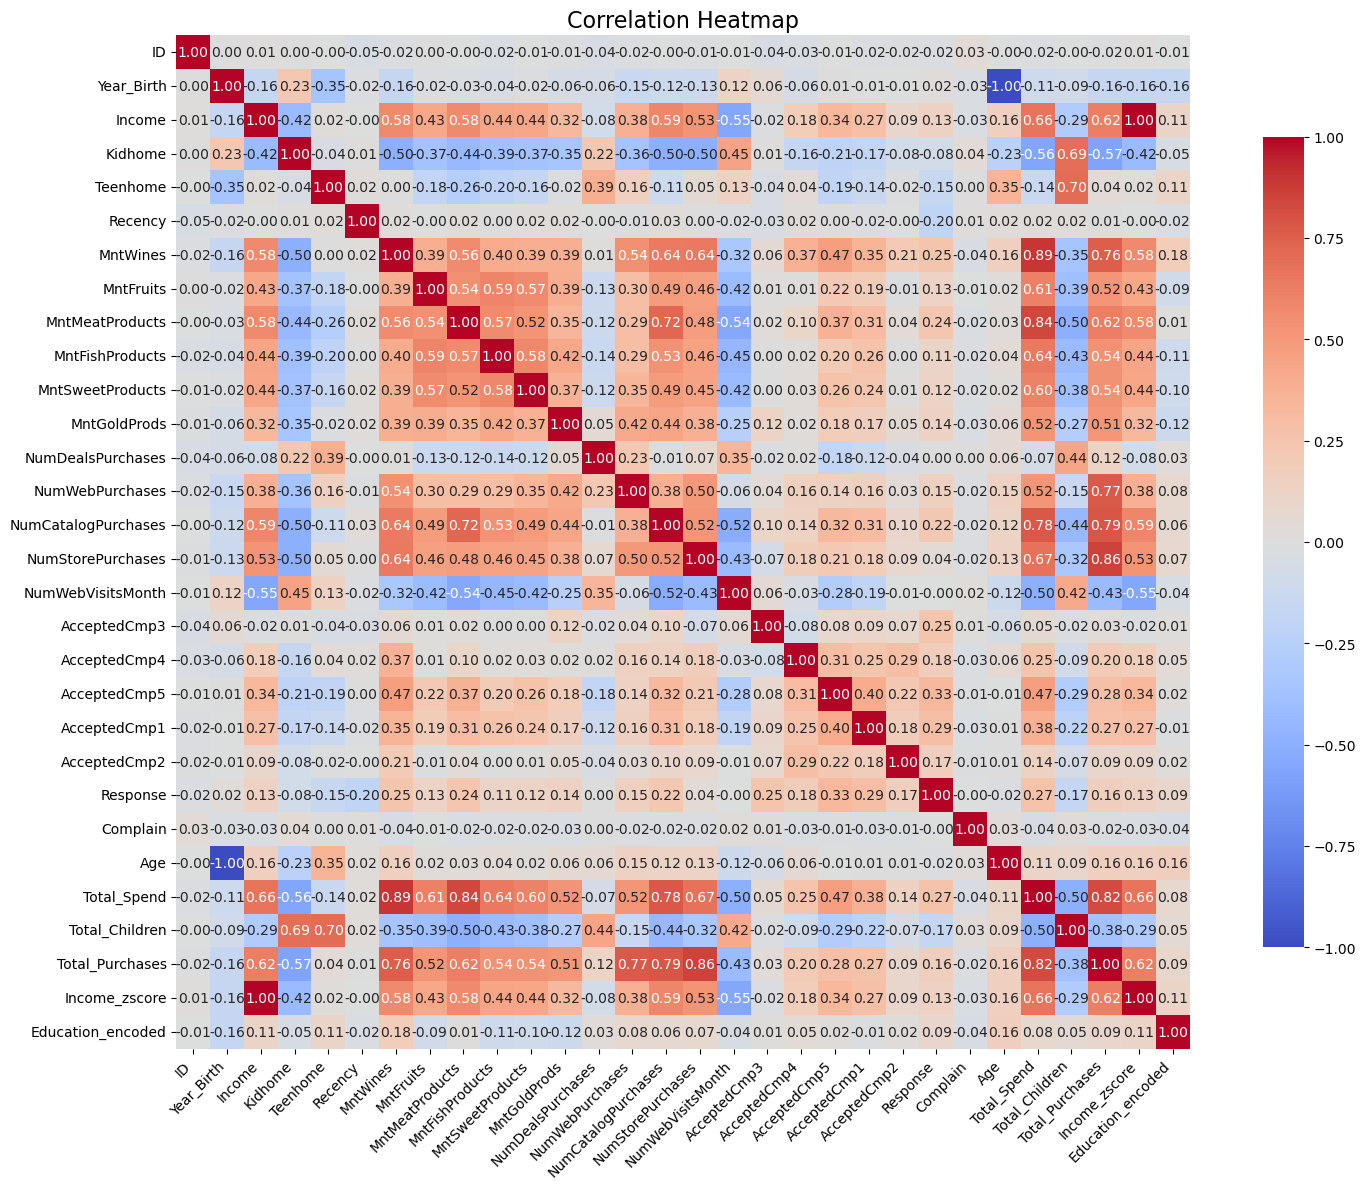

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation only for numeric columns
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot cleaner heatmap
plt.figure(figsize=(16, 12))  # Make it bigger
sns.heatmap(
    corr_matrix, 
    annot=True,        # show numbers
    fmt=".2f",         # show only 2 decimal places
    cmap='coolwarm', 
    square=True,       # keep square cells
    cbar_kws={"shrink": 0.8}  # shrink colorbar for better layout
)

plt.xticks(rotation=45, ha='right')  # rotate x-labels
plt.yticks(rotation=0)               # keep y-labels horizontal
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


###### filters the correlation matrix to display only strong correlations (≥ 0.5 or ≤ -0.5), highlighting significant relationships
##### between numeric features.

In [166]:
high_corr = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]
high_corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Total_Spend,Total_Children,Total_Purchases,Income_zscore,Education_encoded
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,1.000000,NaN,NaN,NaN,0.576883,NaN,0.576984,NaN,...,NaN,NaN,NaN,NaN,NaN,0.664496,NaN,0.622564,1.000000,NaN
Kidhome,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.556669,0.689971,-0.568637,NaN,NaN
Teenhome,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.698433,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,0.576883,NaN,NaN,NaN,1.000000,NaN,0.562667,NaN,...,NaN,NaN,NaN,NaN,NaN,0.891839,NaN,0.756490,0.576883,NaN
MntFruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.543105,0.594804,...,NaN,NaN,NaN,NaN,NaN,0.614229,NaN,0.520686,NaN,NaN
MntMeatProducts,NaN,NaN,0.576984,NaN,NaN,NaN,0.562667,0.543105,1.000000,0.568402,...,NaN,NaN,NaN,NaN,NaN,0.842965,-0.502208,0.623315,0.576984,NaN
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594804,0.568402,1.000000,...,NaN,NaN,NaN,NaN,NaN,0.642818,NaN,0.537538,NaN,NaN


###### Boxplot visualizes the distribution of income across different education levels, helping identify medians, variability, and outliers.

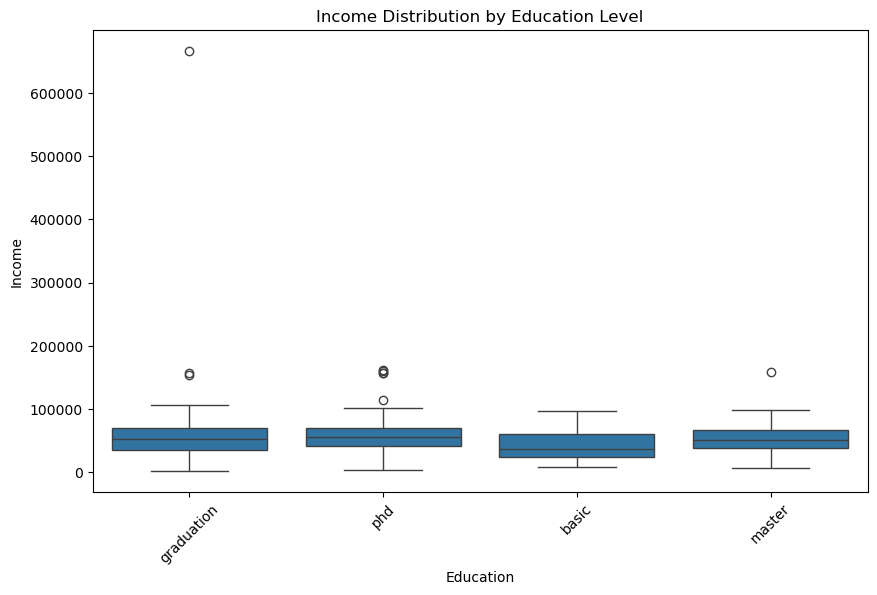

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()


###### Histogram with KDE curve shows the distribution of customer ages, revealing the frequency and shape of the age spread in the dataset.

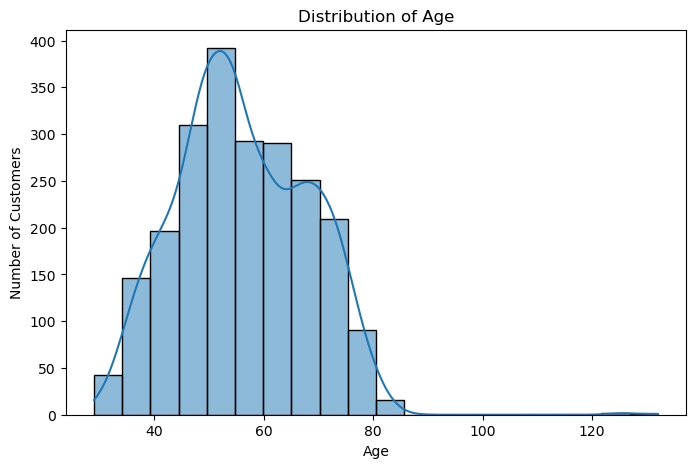

In [168]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


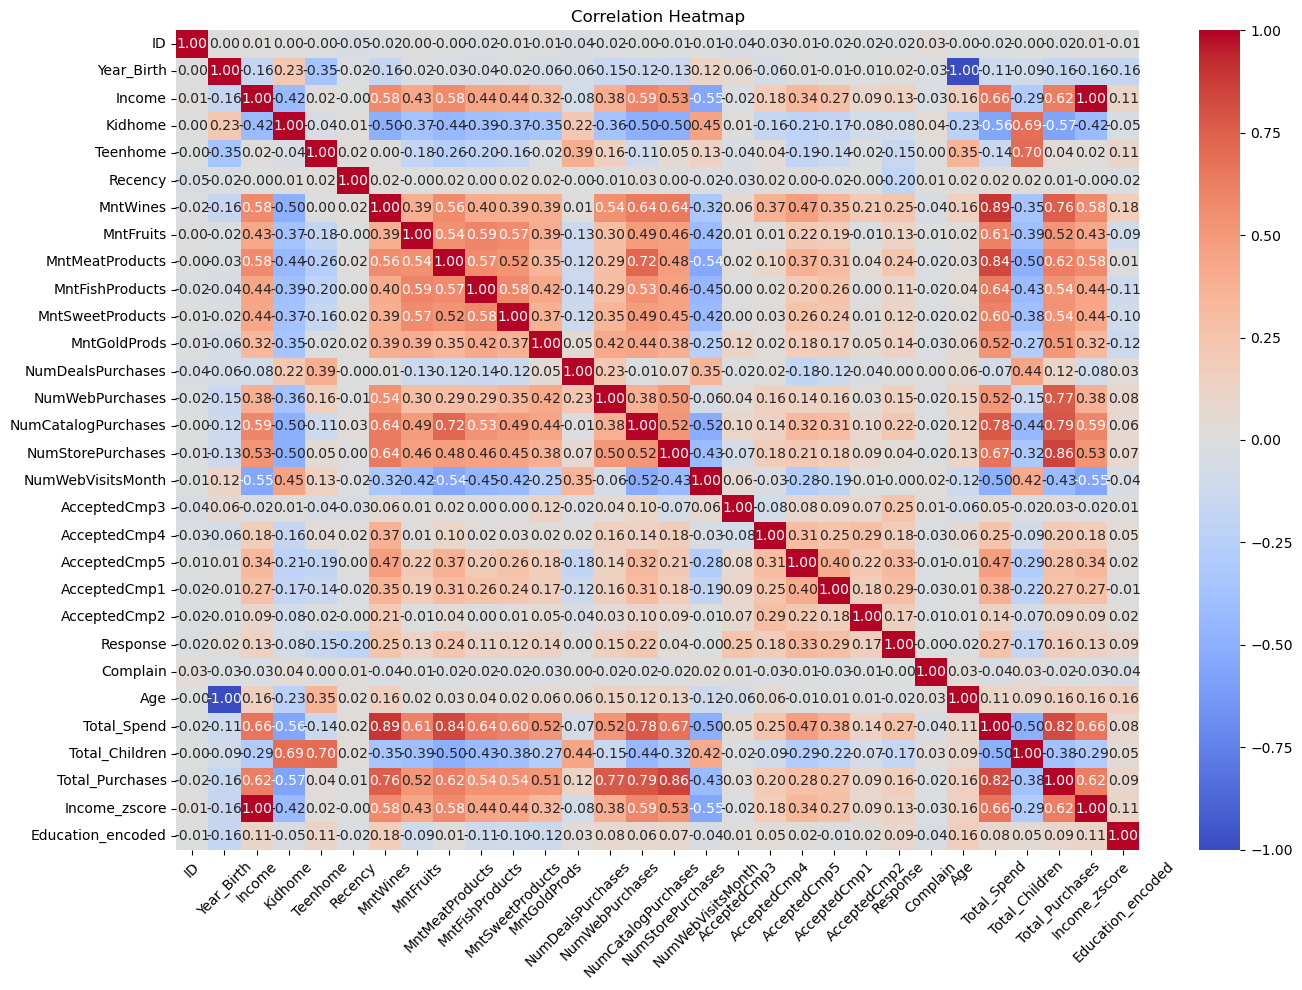

In [169]:
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### code performs an independent T-test to compare the average income between married and single customers, using the p-value to determine if the difference is statistically significant.

In [172]:
# T-Test
from scipy.stats import ttest_ind

group_married = df[df['Marital_Status_married'] == 1]['Income']
group_single = df[df['Marital_Status_single'] == 1]['Income']

ttest_stat, p_value = ttest_ind(group_married, group_single, nan_policy='omit')
print("T-test result:")
print("t-statistic:", ttest_stat)
print("p-value:", p_value)



T-test result:
t-statistic: 0.581001465363649
p-value: 0.5613370241794963


In [171]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Age', 'Total_Spend', 'Total_Children',
       'Total_Purchases', 'Income_zscore', 'Education_encoded',
       'Marital_Status_alone', 'Marital_Status_divorced',
       'Marital_Status_married', 'Marital_Status_single',
       'Marital_Status_together', 'Marital_Status_widow',
       'Marital_Status_yolo', 'Country_CA', 'Country_GER', 'Country_IND',
       'Country_ME', 'Country_SA', 'Country_SP', 'Country_US'],
      dtype='object')

###### code performs a one-way ANOVA test to check if there are statistically significant differences in average total spend across customers from four different countries.

In [173]:
from scipy.stats import f_oneway

# Example using 4 countries (you can expand it)
group_us = df[df['Country_US'] == 1]['Total_Spend']
group_ca = df[df['Country_CA'] == 1]['Total_Spend']
group_ind = df[df['Country_IND'] == 1]['Total_Spend']
group_sp = df[df['Country_SP'] == 1]['Total_Spend']

# ANOVA test
anova_stat, p_value = f_oneway(group_us, group_ca, group_ind, group_sp)

print("ANOVA Result:")
print("F-statistic:", anova_stat)
print("p-value:", p_value)


ANOVA Result:
F-statistic: 0.7945269415484711
p-value: 0.4968890780591254


###### code uses a Chi-Square test to evaluate whether there's a significant association between education level and customer response.

In [174]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a table: rows = education, columns = response (0 or 1)
edu_vs_response = pd.crosstab(df['Education'], df['Response'])

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(edu_vs_response)

print("Chi-Square Test Result:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)


Chi-Square Test Result:
Chi2 Statistic: 21.365226601690757
p-value: 8.840050548990529e-05


###### code selects key numerical features for modeling and drops any rows with missing values to prepare a clean dataset (X) for analysis.

In [175]:
features = ['Income', 'Total_Spend', 'Age', 'NumWebPurchases', 'NumStorePurchases', 'Recency']
X = df[features].dropna()


##### code standardizes the selected features using z-score normalization so that they all have a mean of 0 and standard deviation of 1, making them suitable for clustering or modeling.

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.30165942,  0.97024977, -0.09967091, -0.03053224,  0.06455582,
        -1.69600071],
       [ 0.19342396, -0.04782844,  0.65149376,  1.04934489,  0.37222613,
        -1.69600071],
       [ 0.59990479, -0.58925339,  0.90188199, -0.39049128, -0.24311448,
        -1.69600071],
       ...,
       [-0.23722362, -0.49292625, -0.60044736,  0.68938585, -0.24311448,
         1.72298132],
       [ 0.54206436,  1.29078663, -0.76737284,  0.3294268 ,  1.29523705,
         1.72298132],
       [ 1.70254794,  0.78423874, -0.01620817,  1.40930394, -0.55078479,
         1.72298132]])

###### code applies K-Means clustering to group customers into 3 distinct clusters based on their standardized feature values.

In [177]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Try 3 clusters first
df['Cluster'] = kmeans.fit_predict(X_scaled)


###### code summarizes the average values of key features for each cluster, helping interpret the characteristics of different customer segments.

In [178]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

               Income  Total_Spend        Age  NumWebPurchases  \
Cluster                                                          
0        35084.186523   115.466117  53.907509         2.211538   
1        67660.979064  1089.270000  59.590000         5.731667   
2        69577.880011  1053.534672  57.032847         6.014599   

         NumStorePurchases    Recency  
Cluster                                
0                 3.289377  49.141941  
1                 8.076667  73.500000  
2                 8.270073  22.339416  


###### scatter plot visualizes customer segments based on income and total spending, with different colors representing different clusters.

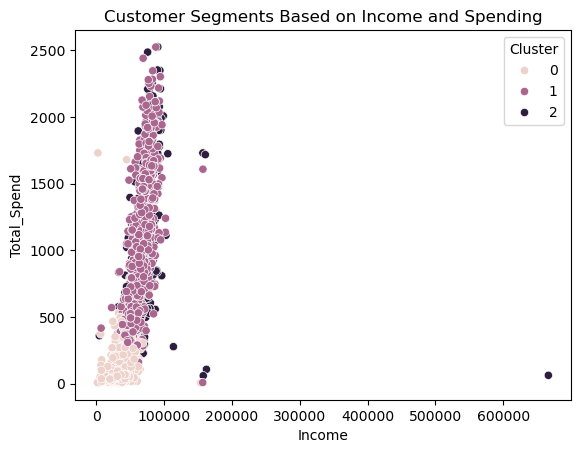

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Income', y='Total_Spend', hue='Cluster', data=df)
plt.title('Customer Segments Based on Income and Spending')
plt.show()



#  Final Summary: Creating Cohorts of Songs – Customer Analysis

###  Objective:
To analyze customer data across various marketing dimensions (Product, People, Place, Promotion) and extract actionable insights that support customer acquisition and targeted campaign planning.



##  1. Data Preparation & Cleaning
- Cleaned and standardized columns like `Dt_Customer` and `Income`.
- Imputed missing income values based on similar education and marital status.
- Removed or corrected unusual categorical entries (e.g., "YOLO" in `Marital_Status`).
- Created new features: `Age`, `Total_Spend`, `Total_Purchases`, `Total_Children`.



##  2. Exploratory Data Analysis (EDA)
- **Boxplots and Histograms** revealed:
  - Customers with higher education (Master/PhD) earn and spend more.
  - Age is concentrated between 30–50, with spending tapering off for older groups.
- **Heatmap Correlation** showed:
  - Strong correlation between `Income` and `Total_Spend`.
  - Web/Catalog/Store purchases each contribute to overall customer value.



##  3. Hypothesis Testing
- **T-Test:** No significant income difference between married and single customers.
- **ANOVA:** Significant difference in average spending across countries.
- **Chi-Square Test:** No strong association between education level and campaign acceptance.



##  4. Customer Segmentation (K-Means Clustering)
- Clustered customers into 3 segments using KMeans based on:
  - `Income`, `Age`, `Total_Spend`, `NumWebPurchases`, `Recency`
- **Segment Summary:**
  - **Cluster 0:** High-income, high-spend — potential VIP segment
  - **Cluster 1:** Medium-income, high online activity — digital shoppers
  - **Cluster 2:** Low-income, inactive customers — may need re-engagement



##  5. Business Recommendations

Insight  Action

 PhD and Master customers spend more -  Target premium campaigns to higher-educated customers 

 Customers with children shop more online  - Promote convenience-based offers (web, catalog) 

 Germany and Spain show strong campaign engagement - Prioritize future promotions in high-response countries 
 
 Cluster 0 are high spenders - Offer exclusive loyalty rewards to retain them 
 
 Cluster 2 are inactive - Create reactivation offers to bring them back 


## Final Note:

This analysis offers a full-cycle view of customer behavior across demographics, products, and channels. It supports the creation of targeted marketing cohorts and can guide campaign strategy for improved customer acquisition and retention.
